In [8]:
import multiprocessing as mp
import random
import numpy as np
import timeit
import platform
from matplotlib import pyplot as plt

In [9]:
def findPrime(upper):
    for num in range(upper + 1):
        if num > 1:
            for i in range(2,num):
                if (num % i) == 0:
                    break
#             else:
#                 print(num)

In [10]:
def serial(samples):
    return findPrime(samples)

def multiprocess(processes, samples):
    pool = mp.Pool(processes=processes)
    results = pool.apply_async(findPrime, args=(samples))
#     results=  pool.apply_async(isPrimeWorker,(i, i+step,))
    pool.close()
    pool.join()
    return results

In [11]:
benchmarks = []
bound=10000

benchmarks.append(timeit.Timer('serial(bound)',
            'from __main__ import serial, bound').timeit(number=1))

benchmarks.append(timeit.Timer('multiprocess(2, bound)',
            'from __main__ import multiprocess, bound').timeit(number=1))

benchmarks.append(timeit.Timer('multiprocess(3, bound)',
            'from __main__ import multiprocess, bound').timeit(number=1))

benchmarks.append(timeit.Timer('multiprocess(4, bound)',
            'from __main__ import multiprocess, bound').timeit(number=1))

benchmarks.append(timeit.Timer('multiprocess(6, bound)',
            'from __main__ import multiprocess, bound').timeit(number=1))

In [21]:
def print_sysinfo():

    print('\nPython version  :', platform.python_version())
    print('compiler        :', platform.python_compiler())
    print('\nsystem     :', platform.system())
    print('release    :', platform.release())
    print('processor  :', platform.processor())
    print('CPU count  :', mp.cpu_count())
    print('Clock speed: 2.3Ghz')
    print('interpreter:', platform.architecture()[0])
    print('\n\n')

In [22]:
def plot_results():
    bar_labels = ['serial', '2', '3', '4', '6']

    fig = plt.figure(figsize=(10,8))

    # plot bars
    y_pos = np.arange(len(benchmarks))
    plt.yticks(y_pos, bar_labels, fontsize=16)
    bars = plt.barh(y_pos, benchmarks,
             align='center', alpha=0.4, color='g')

    # annotation and labels

    for ba,be in zip(bars, benchmarks):
        plt.text(ba.get_width() + 2, ba.get_y() + ba.get_height()/2,
                '{0:.2%}'.format(benchmarks[0]/be),
                ha='center', va='bottom', fontsize=12)

    plt.xlabel('time in seconds for n=%s' %bound, fontsize=14)
    plt.ylabel('number of processes', fontsize=14)
    t = plt.title('Serial vs. Multiprocessing via Parzen-window estimation', fontsize=18)
    plt.ylim([-1,len(benchmarks)+0.5])
    plt.xlim([0,max(benchmarks)*1.1])
    plt.vlines(benchmarks[0], -1, len(benchmarks)+0.5, linestyles='dashed')
    plt.grid()

    plt.show()

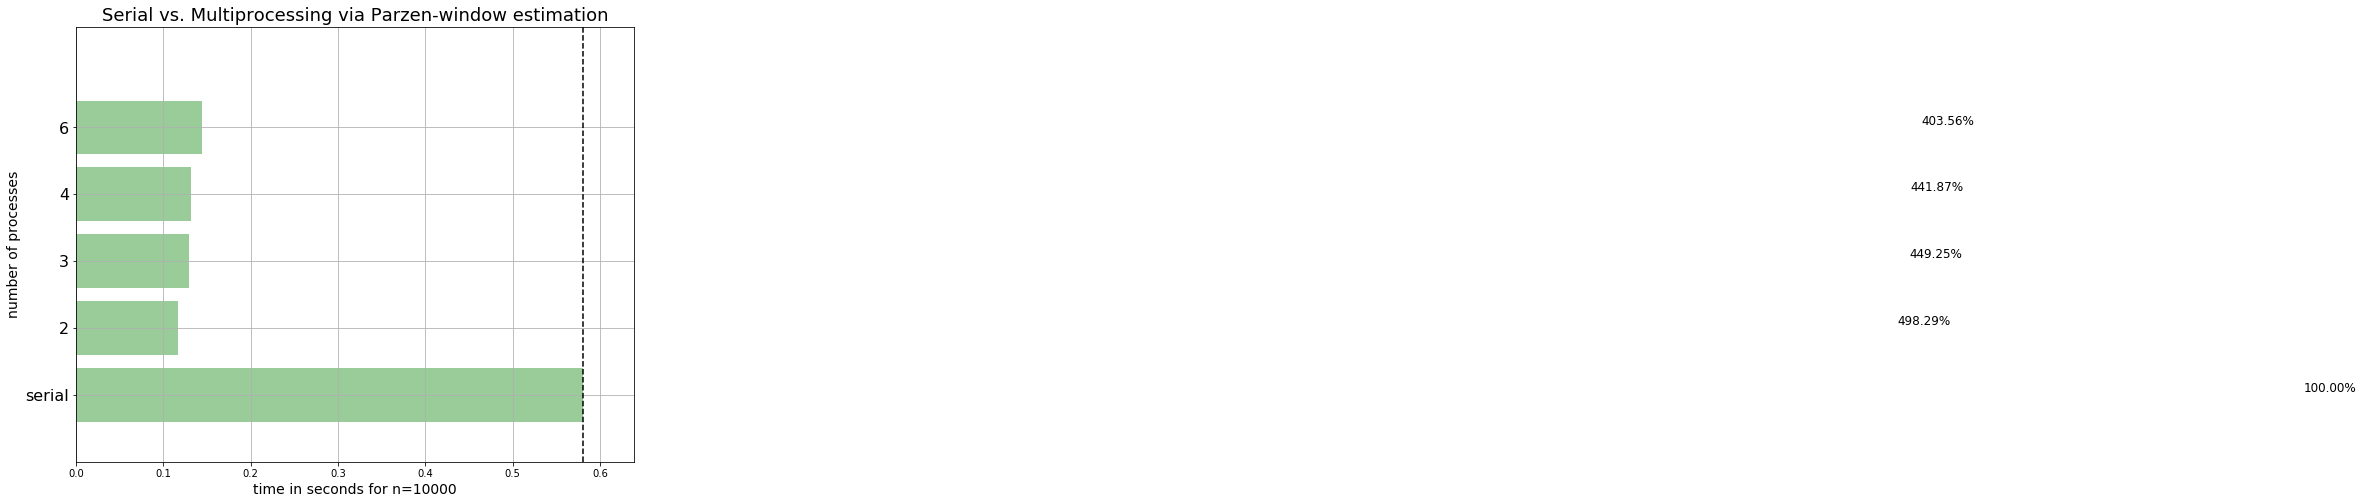

In [23]:
plot_results()

In [24]:
print_sysinfo()


Python version  : 3.6.4
compiler        : GCC 7.2.0

system     : Linux
release    : 4.13.0-39-generic
processor  : x86_64
CPU count  : 4
Clock speed: 2.3Ghz
interpreter: 64bit





source: https://docs.python.org/3.4/library/multiprocessing.html?highlight=process